In [1]:
import glob
from math import ceil
import os
from pprint import pprint
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_dir = "../domain_shift_results"

# experiments still in process; ignore any existing results for these.
in_process_expts = [
    "_debug",
    'diabetes_admtype',  # not in progress - we just want to exclude from results (removed from benchmark)
    'mooc_course'
]

In [3]:
def extract_task_from_filepath(fp:str)->str:
    task = re.search(".*/domain_shift_results/(\w+)/.*", fp).group(1)
    return task

# a list of RGB values for categorical plotting
rgblist = list(sns.color_palette("colorblind", 16))

In [4]:
files = []

for expt in os.listdir(results_dir):
    if expt in in_process_expts:
        print(f"skipping in progress expt at {expt}")
        continue
    wc = os.path.join(results_dir, expt, "**", "**_full.csv")
    full_results = glob.glob(wc)
    if full_results:
        most_recent_result = full_results[-1]
        print(f"got recent result file for expt {expt}")
        files.append(most_recent_result)

got recent result file for expt anes_year
got recent result file for expt acsfoodstamps_region
got recent result file for expt brfss_diabetes_race
got recent result file for expt acsincome_region
got recent result file for expt anes_region
got recent result file for expt nhanes_lead_poverty
got recent result file for expt mimic_extract_los_3_ins
skipping in progress expt at mooc_course
skipping in progress expt at _debug
got recent result file for expt physionet_set
got recent result file for expt diabetes_admsrc
skipping in progress expt at diabetes_admtype
got recent result file for expt acspubcov_year
got recent result file for expt nhanes_cholesterol_race
got recent result file for expt acsunemployment_year
got recent result file for expt mimic_extract_mort_hosp_ins
got recent result file for expt brfss_blood_pressure_income


In [5]:
files


['../domain_shift_results/anes_year/20230101185210/tune_results_anes_year_20230101185210_full.csv',
 '../domain_shift_results/acsfoodstamps_region/20230106161313/tune_results_acsfoodstamps_region_20230106161313_full.csv',
 '../domain_shift_results/brfss_diabetes_race/20230109204618/tune_results_brfss_diabetes_race_20230109204618_full.csv',
 '../domain_shift_results/acsincome_region/20230114002531/tune_results_acsincome_region_20230114002531_full.csv',
 '../domain_shift_results/anes_region/20230110133535/tune_results_anes_region_20230110133535_full.csv',
 '../domain_shift_results/nhanes_lead_poverty/20230109205342/tune_results_nhanes_lead_poverty_20230109205342_full.csv',
 '../domain_shift_results/mimic_extract_los_3_ins/20230113231733/tune_results_mimic_extract_los_3_ins_20230113231733_full.csv',
 '../domain_shift_results/physionet_set/20230101190139/tune_results_physionet_set_20230101190139_full.csv',
 '../domain_shift_results/diabetes_admsrc/20230109231429/tune_results_diabetes_admsr

In [6]:
dfs = []
for f in files:
    df = pd.read_csv(f)
    task = extract_task_from_filepath(f)
    df["task"] = task
    dfs.append(df)

In [7]:
len(dfs)

14

In [8]:
df = pd.concat(dfs)
df['domain_split_ood_values'] = df['domain_split_ood_values'].apply(lambda x: str(x).replace("'", ""))
df['domain_split_id_values'] = df['domain_split_id_values'].apply(lambda x: str(x).replace("'", ""))
df['ood_id_test_accuracy_gap'] = df['ood_test_accuracy'] - df['id_test_accuracy']
df

,train-auc,train-map,validation-auc,validation-map,id_test-auc,id_test-map,ood_test-auc,ood_test-map,ood_validation-auc,ood_validation-map,...,ood_test_3_accuracy,ood_test_5_accuracy,ood_test_6_accuracy,id_test_2-average_precision,ood_test_0-average_precision,ood_test_1-average_precision,ood_test_3-average_precision,ood_test_5-average_precision,ood_test_6-average_precision,ood_id_test_accuracy_gap
0,0.859967,0.902029,0.881125,0.925866,0.872542,0.919961,0.894500,0.934414,0.902139,0.939591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028962
1,0.805127,0.856644,0.823616,0.882994,0.811675,0.870999,0.852571,0.905029,0.841470,0.905356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047115
2,0.747346,0.829408,0.708851,0.825744,0.709987,0.826910,0.681453,0.824842,0.663097,0.827163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.037059
3,0.802530,0.855615,0.814410,0.878067,0.800995,0.866320,0.853459,0.909304,0.875131,0.928597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023341
4,0.675308,0.779708,0.668050,0.789081,0.669585,0.795185,0.665199,0.798295,0.669186,0.807106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
96,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
97,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
98,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [9]:
print(sorted(df.task.unique()))
print(sorted(df.columns))

['acsfoodstamps_region', 'acsincome_region', 'acspubcov_year', 'acsunemployment_year', 'anes_region', 'anes_year', 'brfss_blood_pressure_income', 'brfss_diabetes_race', 'diabetes_admsrc', 'mimic_extract_los_3_ins', 'mimic_extract_mort_hosp_ins', 'nhanes_cholesterol_race', 'nhanes_lead_poverty', 'physionet_set']
['config/params/alpha', 'config/params/colsample_bylevel', 'config/params/colsample_bytree', 'config/params/gamma', 'config/params/lambda', 'config/params/learning_rate', 'config/params/max_bin', 'config/params/max_depth', 'config/params/min_child_samples', 'config/params/min_child_weight', 'config/params/reg_alpha', 'config/params/reg_lambda', 'config/params/subsample', 'date', 'domain_split_id_values', 'domain_split_ood_values', 'domain_split_varname', 'done', 'episodes_total', 'estimator', 'experiment_id', 'hostname', 'id_test-auc', 'id_test-average_precision', 'id_test-map', 'id_test_2-auc', 'id_test_2-average_precision', 'id_test_2-map', 'id_test_2_accuracy', 'id_test_accur

In [10]:
df[['task', 'estimator', 'validation_accuracy']]

,task,estimator,validation_accuracy
0,anes_year,xgb,0.823033
1,anes_year,xgb,0.795159
2,anes_year,xgb,0.692463
3,anes_year,xgb,0.794242
4,anes_year,xgb,0.700165
...,...,...,...
95,brfss_blood_pressure_income,lightgbm,1.000000
96,brfss_blood_pressure_income,lightgbm,1.000000
97,brfss_blood_pressure_income,lightgbm,1.000000
98,brfss_blood_pressure_income,lightgbm,1.000000


In [11]:
def best_by_metric(df_in, metric='validation_accuracy'):
    df_out = df_in.groupby(['task', 'estimator', 'domain_split_ood_values'])\
               .apply(lambda group: group.nlargest(1, columns=metric))\
               .reset_index(drop=True)
    
    # check the outputs
    group_sizes = df_out.groupby(['task', 'estimator', 'domain_split_ood_values']).size()
    if not np.all(group_sizes.values == 1):
        print(group_sizes)
        raise ValueError("got unexpected results - more than one observation per group.")
    return df_out

In [12]:
best_acc_per_task = best_by_metric(df)
best_acc_per_task[['validation_accuracy', 'task', 'estimator', 'domain_split_ood_values']]

,validation_accuracy,task,estimator,domain_split_ood_values
0,0.842778,acsfoodstamps_region,lightgbm,[00]
1,0.842918,acsfoodstamps_region,lightgbm,[01]
2,0.838865,acsfoodstamps_region,lightgbm,[02]
3,0.841778,acsfoodstamps_region,lightgbm,[03]
4,0.840553,acsfoodstamps_region,lightgbm,[04]
...,...,...,...,...
122,0.977642,nhanes_lead_poverty,xgb,[1.0]
123,0.978740,physionet_set,lightgbm,[a]
124,0.978779,physionet_set,lightgbm,[b]
125,0.978904,physionet_set,xgb,[a]


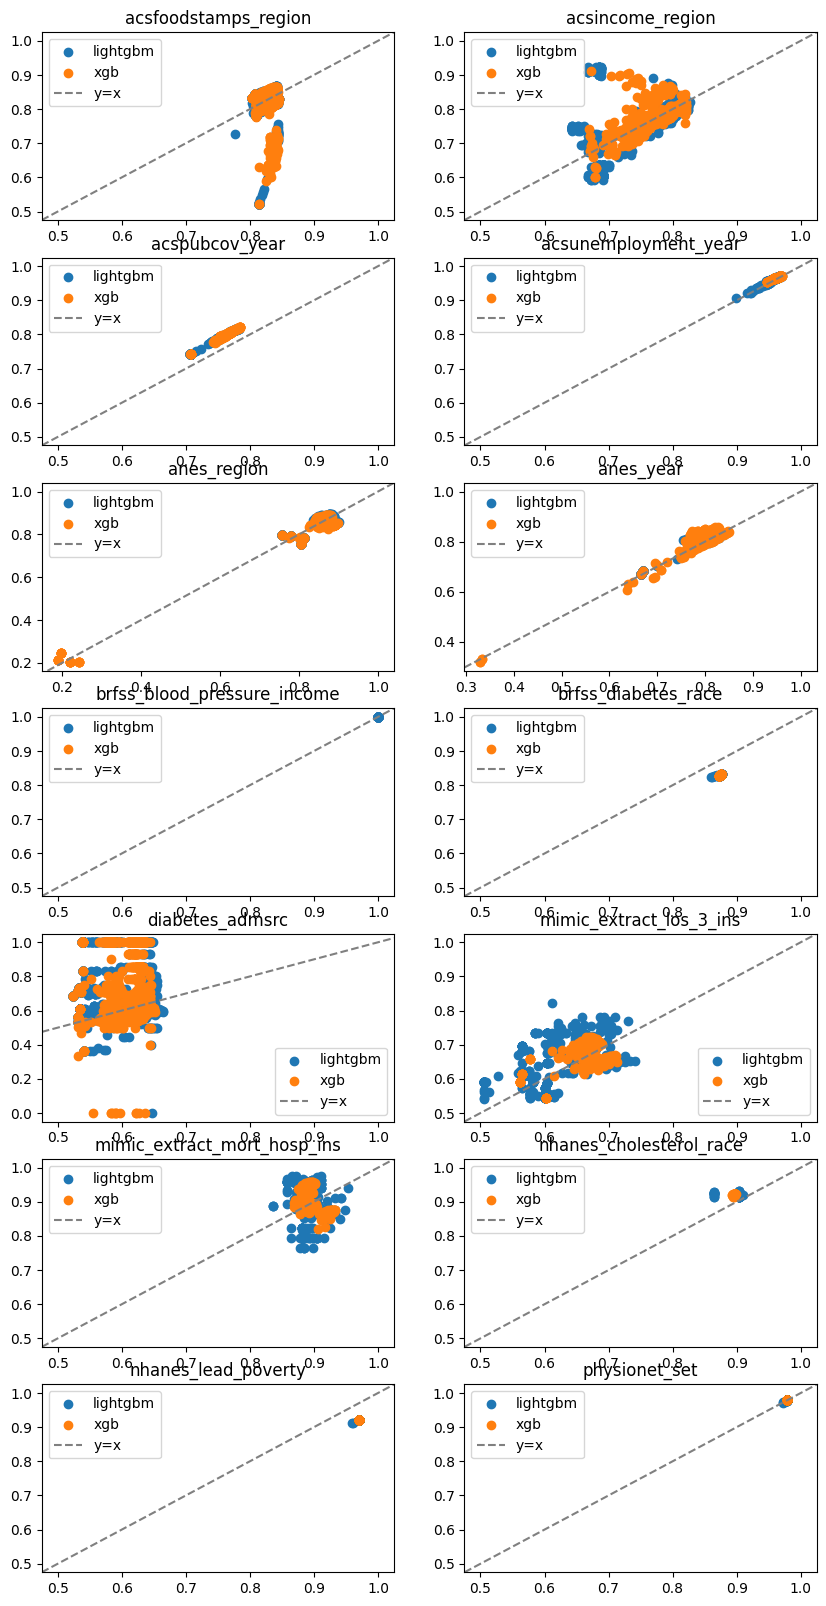

In [13]:
tasks = sorted(df.task.unique())

fig, axs = plt.subplots(ncols=2, nrows=ceil(len(tasks)/2), figsize=(10,20))
for i, task in enumerate(tasks):
    rownum = i // 2
    colnum = i % 2
    ax = axs[rownum,colnum]
    for est in sorted(df.estimator.unique()):
        df_ = df.query(f"estimator == '{est}' and task == '{task}'")
        ax.scatter(df_['id_test_accuracy'].values, df_['ood_test_accuracy'].values, label=est)
    ax.axline((0.5,0.5), (1, 1), linestyle="dashed", color="grey", label="y=x")
    ax.legend()
    
    ax.set_title(task)

In [14]:
task.rsplit("_")

['physionet', 'set']

empty dataframe for estimator xgb task brfss_blood_pressure_income; skipping
empty dataframe for estimator lightgbm task brfss_blood_pressure_income; skipping


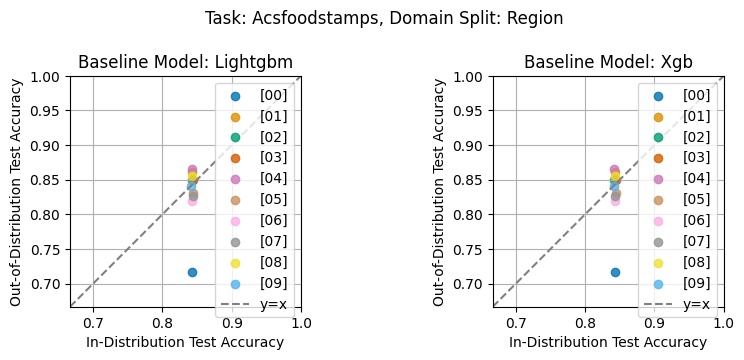

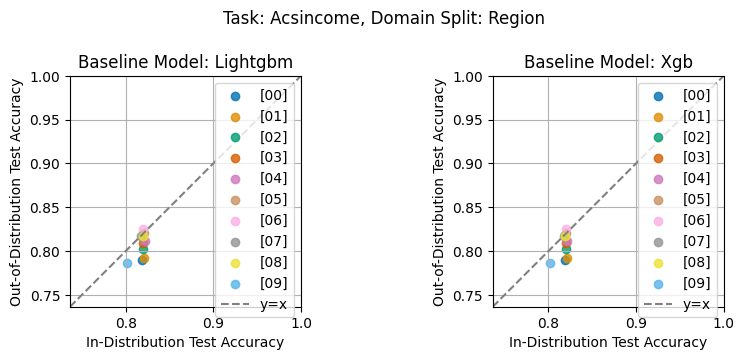

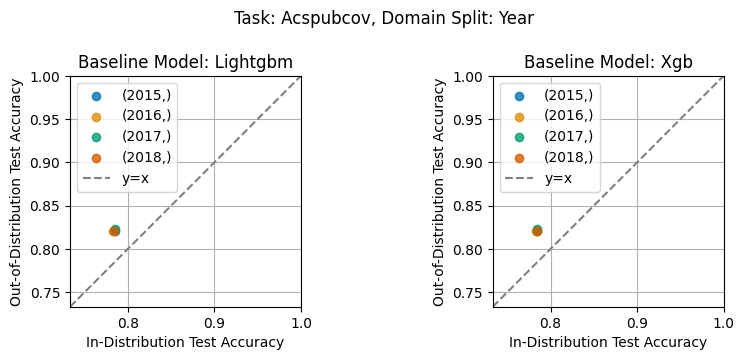

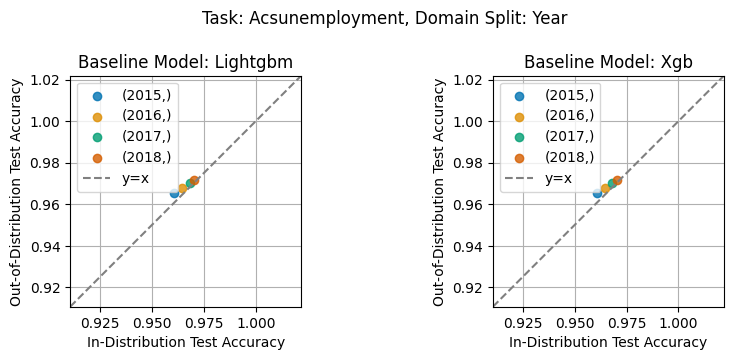

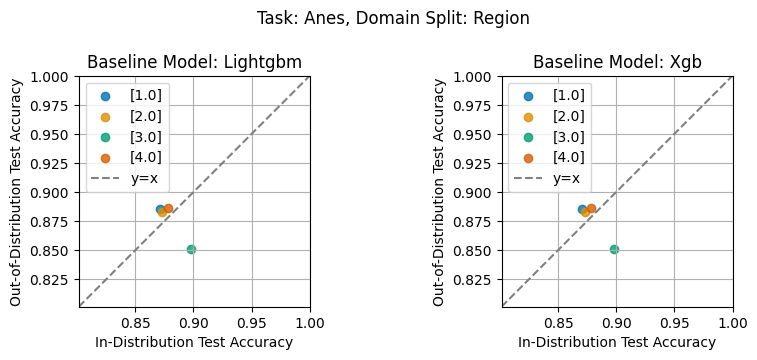

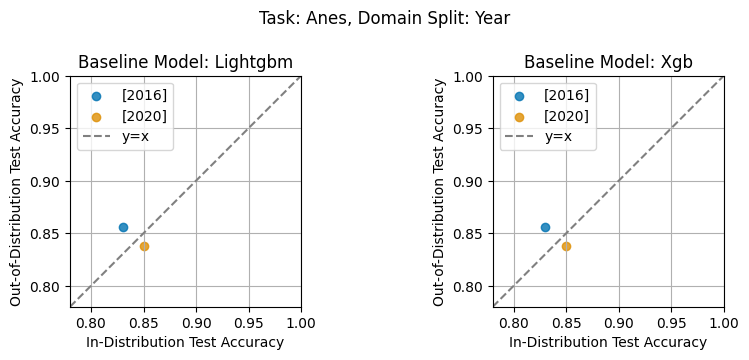

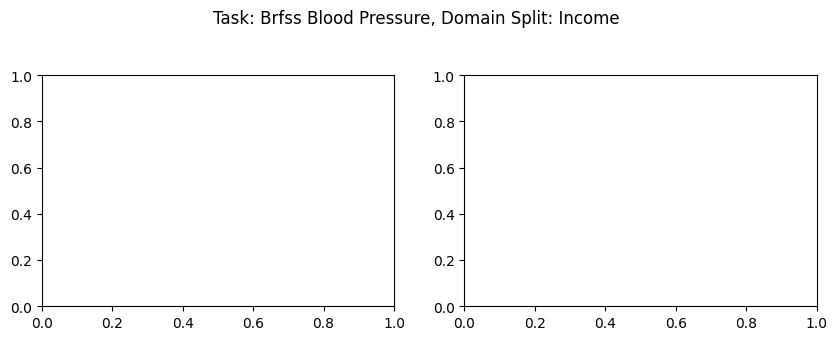

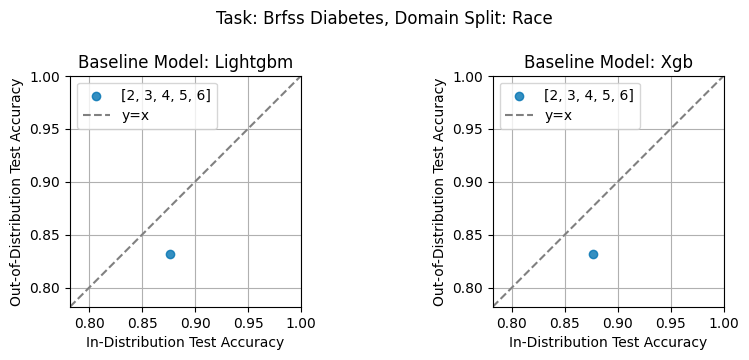

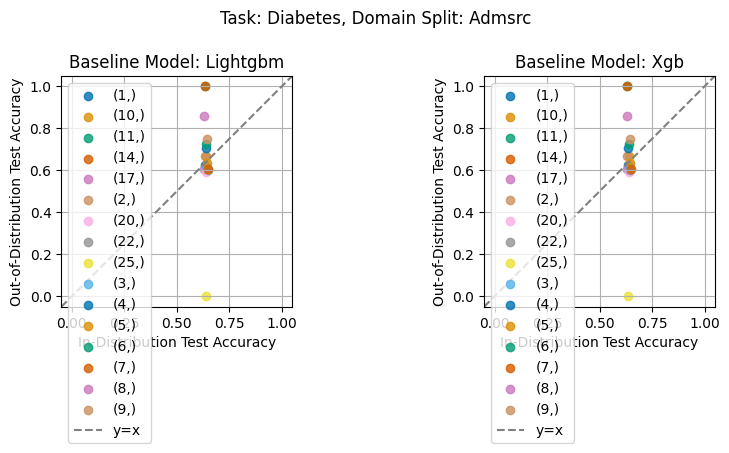

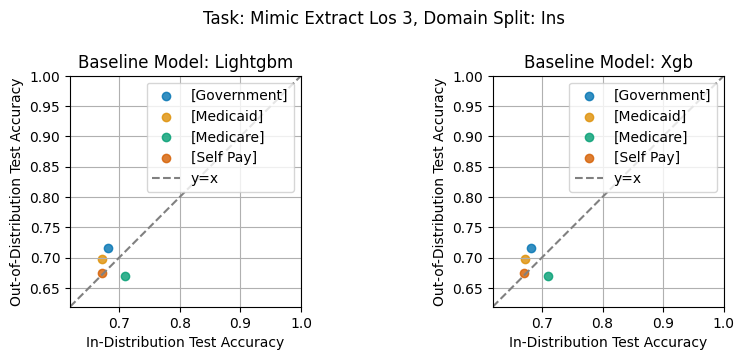

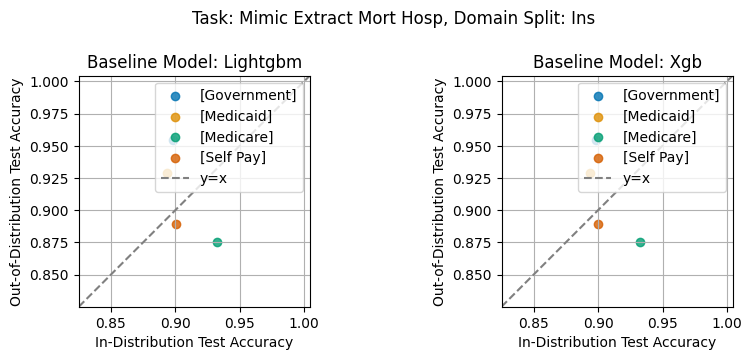

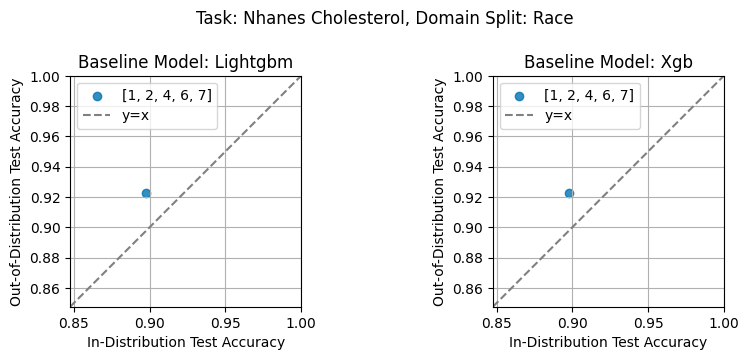

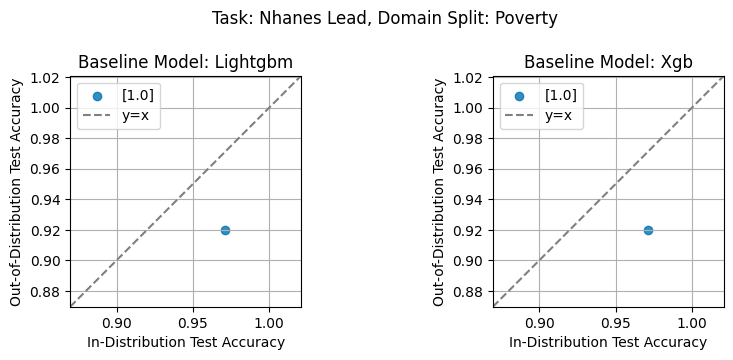

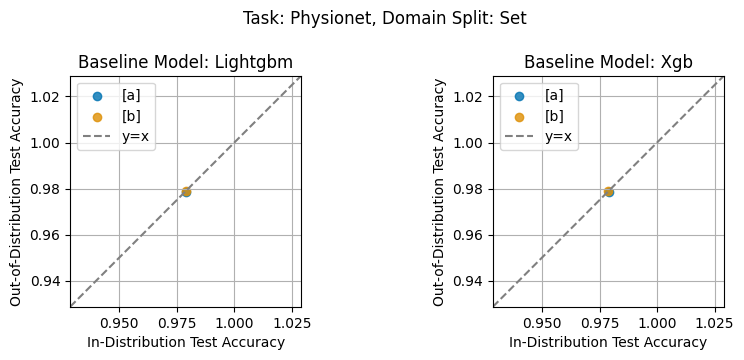

In [15]:
axpad = 0.05  # amount to pad x and y axes in either direction.

for i, task in enumerate(tasks):
    task_name, split_name = task.rsplit("_", 1)
    
    estimators = ('xgb', 'lightgbm')
    if not len(best_acc_per_task.query(f"task == '{task}'")):
        continue
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

    for i, estimator in enumerate(estimators):
        ax = axs[i-1]
        df_ = best_acc_per_task.query(f"estimator == '{est}' and task == '{task}'")
        if not len(df_):
            print(f"empty dataframe for estimator {estimator} task {task}; skipping")
            continue
        for j, ood_vals in enumerate(df_['domain_split_ood_values'].unique()):
            tmp = df_.query(f"domain_split_ood_values == '{ood_vals}'")
            assert len(tmp) == 1
            ax.scatter(tmp['id_test_accuracy'].values, 
                        tmp['ood_test_accuracy'].values,
                        # tmp['ood_id_test_accuracy_gap'],
                        label=ood_vals,
                       color=rgblist[j],
                        alpha=0.8)
        xymin = min(df_['id_test_accuracy'].values.min(),
                    df_['ood_test_accuracy'].values.min()) - axpad

        xymax = max(df_['id_test_accuracy'].values.max(),
                    df_['ood_test_accuracy'].values.max()) + axpad
        xymax = max(xymax, 1)
        ax.axline( (xymin,xymin), slope=1, linestyle="dashed", color="grey", label="y=x")        
        ax.set_xlabel("In-Distribution Test Accuracy")
        ax.set_ylabel("Out-of-Distribution Test Accuracy")
        ax.set_title(f"Baseline Model: {estimator.title()}")
        ax.set(xlim=(xymin,xymax), ylim=(xymin,xymax))
        ax.set_aspect("equal")
        
        ax.legend()
        ax.grid()
    plt.suptitle(f"Task: {task_name.replace('_', ' ').title()}, Domain Split: {split_name.title()}", y=1.1)
#     axs[0].legend(bbox_to_anchor=(1.5, -0.2, 0.5, 0.5), ncols=df_['domain_split_ood_values'].nunique())
        


In [17]:
task = 'acsincome_region'
best_acc_per_task.query(f"task == '{task}'").set_index(
    keys=['task', 'domain_split_ood_values', 'estimator']
)[['validation_accuracy', 'id_test_accuracy', 'ood_test_accuracy', 'ood_id_test_accuracy_gap']]\
.sort_index(level=[-2])

validation_accuracy  \
task             domain_split_ood_values estimator                        
acsincome_region [00]                    lightgbm              0.822637   
                                         xgb                   0.819008   
                 [01]                    lightgbm              0.821891   
                                         xgb                   0.821644   
                 [02]                    lightgbm              0.824311   
                                         xgb                   0.822415   
                 [03]                    lightgbm              0.820552   
                                         xgb                   0.819953   
                 [04]                    lightgbm              0.821104   
                                         xgb                   0.820395   
                 [05]                    lightgbm              0.824743   
                                         xgb                   0.822755   
                 [06]                    lightgbm              0.825348   
                                         xgb                   0.819984   
                 [07]                    lightgbm              0.821419   
                                         xgb                   0.821335   
                 [08]                    lightgbm              0.819657   
                                         xgb                   0.820874   
                 [09]                    lightgbm              0.822032   
                                         xgb                   0.800801   

                                                    id_test_accuracy  \
task             domain_split_ood_values estimator                     
acsincome_region [00]                    lightgbm           0.818674   
                                         xgb                0.819165   
                 [01]                    lightgbm           0.821689   
                                         xgb                0.821297   
                 [02]                    lightgbm           0.814569   
                                         xgb                0.819696   
                 [03]                    lightgbm           0.816874   
                                         xgb                0.819791   
                 [04]                    lightgbm           0.820991   
                                         xgb                0.821462   
                 [05]                    lightgbm           0.821344   
                                         xgb                0.820572   
                 [06]                    lightgbm           0.817525   
                                         xgb                0.819598   
                 [07]                    lightgbm           0.814146   
                                         xgb                0.817570   
                 [08]                    lightgbm           0.820986   
                                         xgb                0.819416   
                 [09]                    lightgbm           0.817609   
                                         xgb                0.801368   

                                                    ood_test_accuracy  \
task             domain_split_ood_values estimator                      
acsincome_region [00]                    lightgbm            0.799216   
                                         xgb                 0.790151   
                 [01]                    lightgbm            0.809147   
                                         xgb                 0.791901   
                 [02]                    lightgbm            0.800811   
                                         xgb                 0.802129   
                 [03]                    lightgbm            0.817743   
                                         xgb                 0.809405   
                 [04]                    lightgbm            0.808065   
             